In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import trackbact as tb
import plotbact as pb

# Load the data

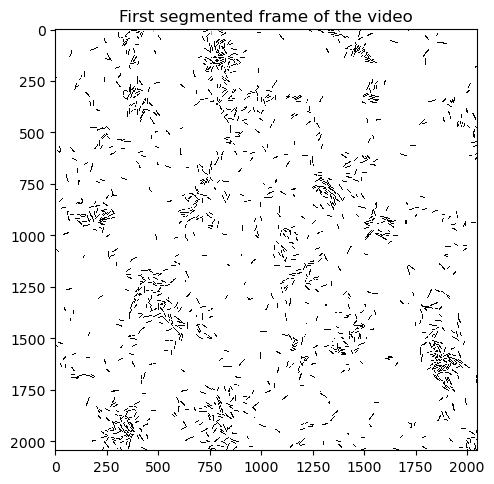

2044 2048


In [2]:
file_name="PilG_dilute_segmented.tif"
im=tb.load_tif(file_name, show=True)
tifdim1=im.shape[1]
tifdim2=im.shape[2]
print(tifdim1, tifdim2)

# Fit ellipses to the contours

Finding the contours of the bacteria...: 100%|███████████████████████████████████████| 241/241 [00:03<00:00, 76.92it/s]


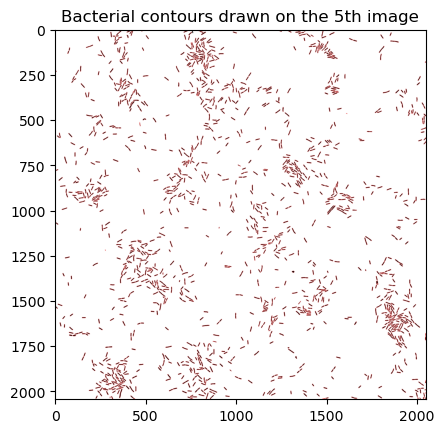

Fitting ellipses to the contours...: 100%|███████████████████████████████████████████| 241/241 [00:08<00:00, 29.12it/s]


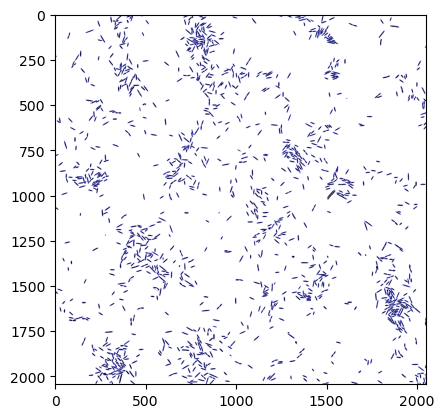

In [3]:
fitted_ellipses=tb.fit_ellipses(im, show_nth_frame=5, filter_max=(20,80))

# Format the data and plot the distribution of alignment angles

,x,y,frame,major_axis_size,minor_axis_size,body_angle
0,1482.860840,2042.499390,0,15.476563,2.687370,85.617630
1,2002.701538,2040.807129,0,6.834268,3.987850,152.039047
2,2042.614868,2039.459717,0,10.293874,3.727504,158.551590
3,1500.558716,2038.583130,0,19.792843,4.811982,77.017342
4,749.539246,2038.037964,0,19.760757,4.225692,113.168434
...,...,...,...,...,...,...
353201,1373.018433,7.225316,240,22.937532,5.621452,129.656830
353202,758.098083,17.038513,240,41.172260,4.474024,171.752777
353203,569.943909,0.389502,240,6.513364,2.771308,111.506134
353204,416.537018,6.087779,240,20.288712,5.221791,54.882519


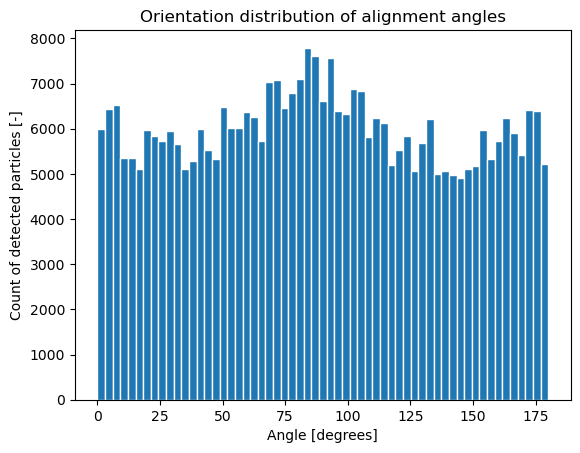

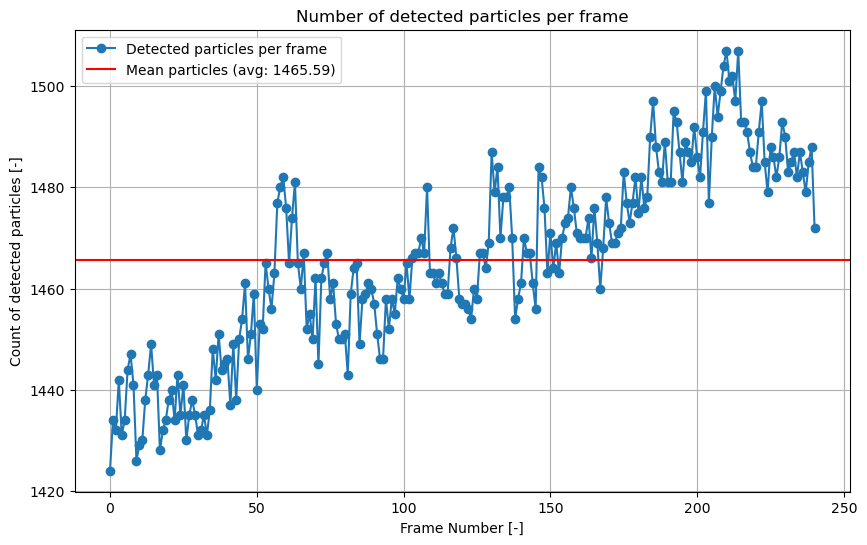

In [4]:
#format the fitted ellipses into a dataframe for tracking
ellipses_df=tb.format_ellipses(fitted_ellipses)
display(ellipses_df)

#For PIV analysis: Uncomment below to transform ellipses into single points
#tb.ellipse_to_particle(im, file_name, ellipses_df)


plt.hist(ellipses_df["body_angle"], bins=59, histtype='bar', ec='white')
plt.title("Orientation distribution of alignment angles")
plt.xlabel('Angle [degrees]')
plt.ylabel('Count of detected particles [-]')
plt.show()

# Count the number of particles per frame
particles_per_frame = ellipses_df.groupby('frame').size()

# Calculate the mean number of particles across all frames
mean_particles = particles_per_frame.mean()

# Plotting the number of detected particles per frame
plt.figure(figsize=(10,6))
plt.plot(particles_per_frame.index, particles_per_frame.values, marker='o', label='Detected particles per frame')  # Use plt.bar for a bar chart

# Plotting the mean number of particles as a horizontal line
plt.axhline(y=mean_particles, color='r', linestyle='-', label=f'Mean particles (avg: {mean_particles:.2f})')

# Adding titles and labels
plt.title('Number of detected particles per frame')
plt.xlabel('Frame Number [-]')
plt.ylabel('Count of detected particles [-]')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

In [5]:
import trackpy.diag
trackpy.diag.performance_report()

Yes, but could it be faster?
FAST: numba is available and enabled (fast subnets and feature-finding).


# Track the bacteria and write the results to disk

In [6]:
traj_tp = tb.track_bacteria(ellipses_df, max_search_range=10, min_search_range=2, filter=30)
display(traj_tp)
tb.write_trajectory(traj_tp, file_name)

Frame 240: 1472 trajectories present.


,particle,count
0,1222,241
1,723,241
2,689,241
3,691,241
4,1261,241
...,...,...
1961,6398,31
1962,8439,31
1963,7243,31
1964,8372,31


,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,1461.141968,734.692017,0,32.321651,4.981523,107.179878,1
1,1460.586914,734.548462,1,33.286587,5.077004,107.015648,1
2,1460.530396,734.489929,2,32.994961,4.955267,107.395515,1
3,1460.362183,734.449585,3,33.279160,4.983717,107.193871,1
4,1460.772217,734.608337,4,34.950340,5.013648,107.680115,1
...,...,...,...,...,...,...,...
311969,738.415527,1726.980103,236,19.708015,4.572733,153.833725,8989
311970,738.497742,1727.017090,237,20.279699,4.397583,153.970032,8989
311971,738.415527,1726.980103,238,19.708015,4.572733,153.833725,8989
311972,738.464905,1726.791626,239,19.900505,4.372700,152.741898,8989


# Load the results of the tracking

In [7]:
traj_loaded=tb.read_trajectory(file_name)
display(traj_loaded)

,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,1461.141968,734.692017,0,32.321651,4.981523,107.179878,1
1,1460.586914,734.548462,1,33.286587,5.077004,107.015648,1
2,1460.530396,734.489929,2,32.994961,4.955267,107.395515,1
3,1460.362183,734.449585,3,33.279160,4.983717,107.193871,1
4,1460.772217,734.608337,4,34.950340,5.013648,107.680115,1
...,...,...,...,...,...,...,...
311969,738.415527,1726.980103,236,19.708015,4.572733,153.833725,8989
311970,738.497742,1727.017090,237,20.279699,4.397583,153.970032,8989
311971,738.415527,1726.980103,238,19.708015,4.572733,153.833725,8989
311972,738.464905,1726.791626,239,19.900505,4.372700,152.741898,8989


# Plot trajectories

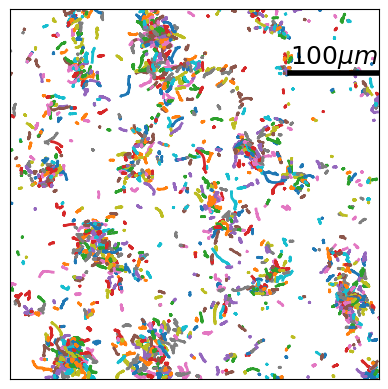

In [8]:
tb.plot_traj_all(traj_loaded, imdim1=tifdim1, imdim2=tifdim2, pix_size=0.1625)

# Calculate the kinematic parameters such as velocity and acceleration etc.

In [9]:
particle_params=tb.calculate_kinematic_parameters(traj_tp, time_step=1)

display(particle_params)


tb.write_kinematics(particle_params, file_name)

100%|█████████████████████████████████████████████████████████████████████████████| 1966/1966 [00:16<00:00, 116.04it/s]


,x [um],y [um],frame,major_axis_size [um],minor_axis_size [um],body_angle [degrees],particle,vx [um/s],vy [um/s],vel [um/s],ax [um/s^2],ay [um/s^2],acc [um/s^2],diff_body_angle [degrees],angular_vel [degrees/s],angular_acc [degrees/s^2]
0,237.435570,119.387453,0,5.252268,0.809497,107.179878,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,237.345374,119.364125,1,5.409070,0.825013,107.015648,1,-0.090196,-0.023328,0.093164,NaN,NaN,NaN,-0.164230,NaN,NaN
2,237.336189,119.354613,2,5.361681,0.805231,107.395515,1,-0.009184,-0.009512,0.013222,0.081012,0.013816,0.082182,0.379868,0.544098,NaN
3,237.308855,119.348058,3,5.407863,0.809854,107.193871,1,-0.027335,-0.006556,0.028110,-0.018150,0.002956,0.018389,-0.201645,-0.581512,-1.125610
4,237.375485,119.373855,4,5.679430,0.814718,107.680115,1,0.066631,0.025797,0.071450,0.093965,0.032353,0.099379,0.486244,0.687889,1.269402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311969,119.992523,280.634267,236,3.202553,0.743069,153.833725,8989,0.002668,0.030072,0.030190,-0.014560,0.020293,0.024976,1.486343,0.959473,2.003098
311970,120.005883,280.640277,237,3.295451,0.714607,153.970032,8989,0.013360,0.006010,0.014650,0.010692,-0.024062,0.026330,0.136307,-1.350037,-2.309509
311971,119.992523,280.634267,238,3.202553,0.743069,153.833725,8989,-0.013360,-0.006010,0.014650,-0.026720,-0.012021,0.029299,-0.136307,-0.272614,1.077423
311972,120.000547,280.603639,239,3.233832,0.710564,152.741898,8989,0.008024,-0.030627,0.031661,0.021384,-0.024617,0.032608,-1.091827,-0.955521,-0.682907


# Data analysis

,x [um],y [um],frame,major_axis_size [um],minor_axis_size [um],body_angle [degrees],particle,vx [um/s],vy [um/s],vel [um/s],ax [um/s^2],ay [um/s^2],acc [um/s^2],diff_body_angle [degrees],angular_vel [degrees/s],angular_acc [degrees/s^2]
0,237.435570,119.387453,0,5.252268,0.809497,107.179878,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,237.345374,119.364125,1,5.409070,0.825013,107.015648,1,-0.090196,-0.023328,0.093164,NaN,NaN,NaN,-0.164230,NaN,NaN
2,237.336189,119.354613,2,5.361681,0.805231,107.395515,1,-0.009184,-0.009512,0.013222,0.081012,0.013816,0.082182,0.379868,0.544098,NaN
3,237.308855,119.348058,3,5.407863,0.809854,107.193871,1,-0.027335,-0.006556,0.028110,-0.018150,0.002956,0.018389,-0.201645,-0.581512,-1.125610
4,237.375485,119.373855,4,5.679430,0.814718,107.680115,1,0.066631,0.025797,0.071450,0.093965,0.032353,0.099379,0.486244,0.687889,1.269402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311969,119.992523,280.634267,236,3.202553,0.743069,153.833725,8989,0.002668,0.030072,0.030190,-0.014560,0.020293,0.024976,1.486343,0.959473,2.003098
311970,120.005883,280.640277,237,3.295451,0.714607,153.970032,8989,0.013360,0.006010,0.014650,0.010692,-0.024062,0.026330,0.136307,-1.350037,-2.309509
311971,119.992523,280.634267,238,3.202553,0.743069,153.833725,8989,-0.013360,-0.006010,0.014650,-0.026720,-0.012021,0.029299,-0.136307,-0.272614,1.077423
311972,120.000547,280.603639,239,3.233832,0.710564,152.741898,8989,0.008024,-0.030627,0.031661,0.021384,-0.024617,0.032608,-1.091827,-0.955521,-0.682907


Indexation of Groups (particles) and their reversals:
       Particle  Reversals
Index                     
0             1        112
1             2         90
2             4         85
3             5         94
4             6         44
...         ...        ...
1961       8941         19
1962       8951          5
1963       8952         11
1964       8967         21
1965       8989         11

[1966 rows x 2 columns]

Total number of unique particles: 1966

Average number of reversals: 58.78942014242116
Standard deviation of reversals: 38.025000614394294


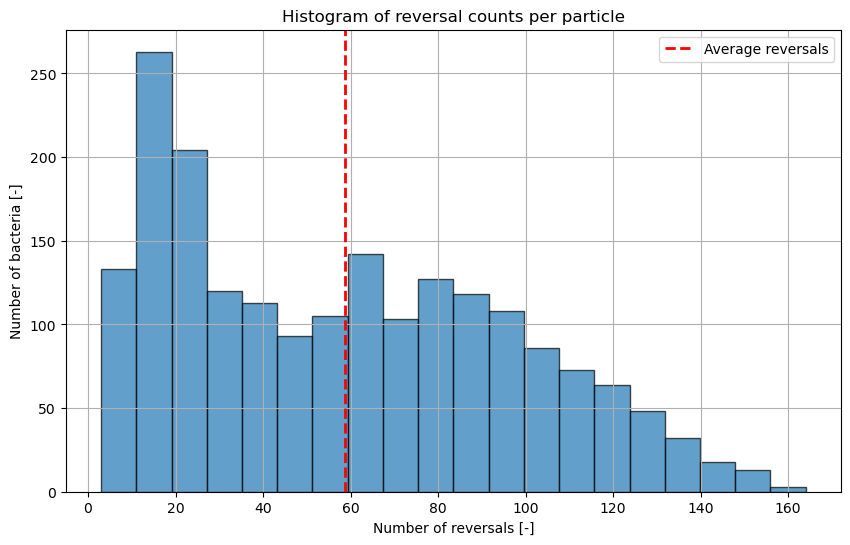

In [10]:
#To quantify reversal
loaded_params=tb.read_kinematics(file_name)
display(loaded_params)
pb.plot_reversals(loaded_params)

Mean velocities for each particle:
           vx [um/s]  vy [um/s]  vel [um/s]
particle                                  
1          0.011017   0.006281    0.098822
2         -0.005167   0.018267    0.085789
4         -0.010456  -0.011628    0.097603
5         -0.002969   0.003409    0.095172
6          0.059087   0.018706    0.171121
...             ...        ...         ...
8941       0.036647   0.020107    0.210469
8951       0.020329   0.031184    0.121880
8952      -0.002319  -0.011244    0.065595
8967      -0.025293   0.043980    0.147544
8989       0.027994   0.045360    0.250166

[1966 rows x 3 columns]
Standard deviations for each particle:
           vx [um/s]  vy [um/s]  vel [um/s]
particle                                  
1          0.112411   0.069435    0.088388
2          0.033079   0.112032    0.081344
4          0.113490   0.057137    0.082607
5          0.112879   0.075367    0.096678
6          0.295227   0.073241    0.258578
...             ...        ...         

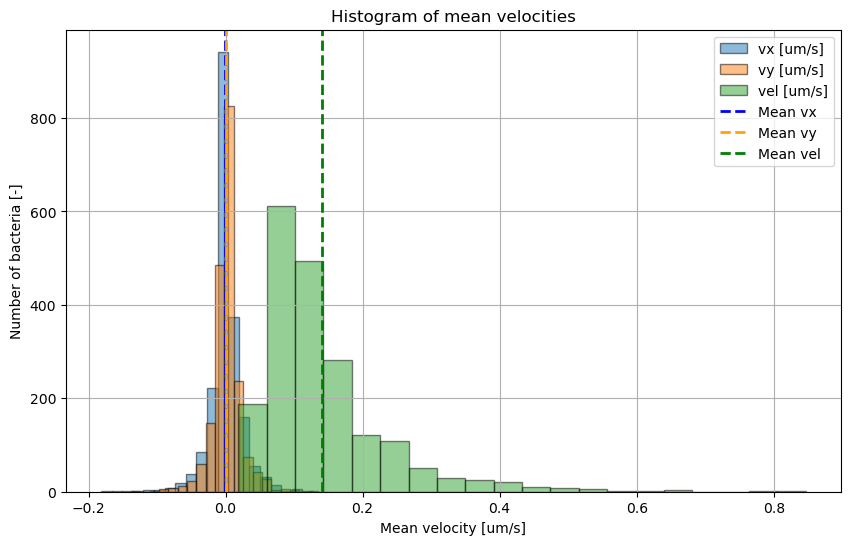

In [11]:
pb.plot_mean_velocities(loaded_params)

Total distance for each particle:
 particle
1       23.717286
2       20.589305
4       23.424698
5       22.841383
6       20.021212
          ...    
8941     6.735011
8951     3.900170
8952     2.099047
8967     4.721409
8989     7.755139
Name: distance, Length: 1966, dtype: float64
Mean Trajectory Length: 18.538321862901533
Standard deviation of trajectory length: 11.216698954967722


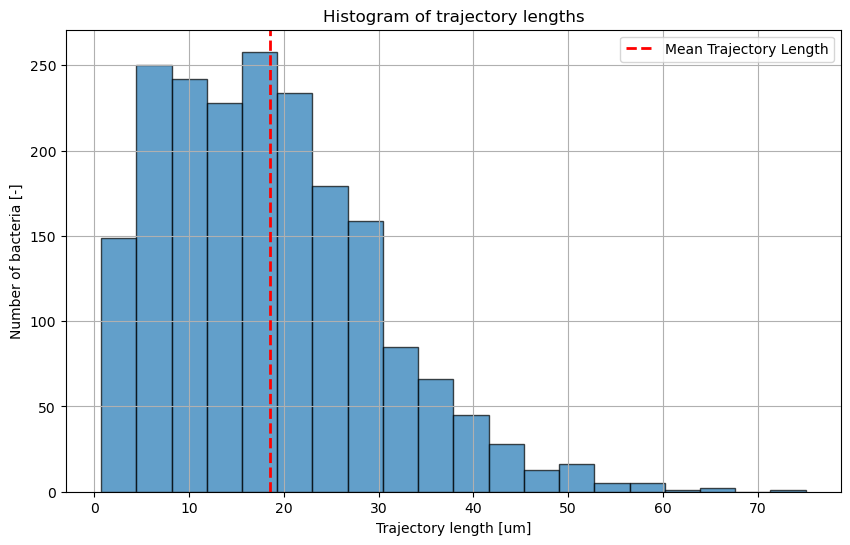

In [12]:
pb.plot_traj_lentgth(loaded_params)

End-to-end distance for each particle:
 particle
1       3.043575
2       4.556051
4       3.753061
5       1.084885
6       7.251385
          ...   
8941    1.337621
8951    1.191203
8952    0.367372
8967    1.623490
8989    1.652380
Length: 1966, dtype: float64
Mean Trajectory Length: 2.73969935226554
Standard deviation of trajectory length: 2.9309241781737247


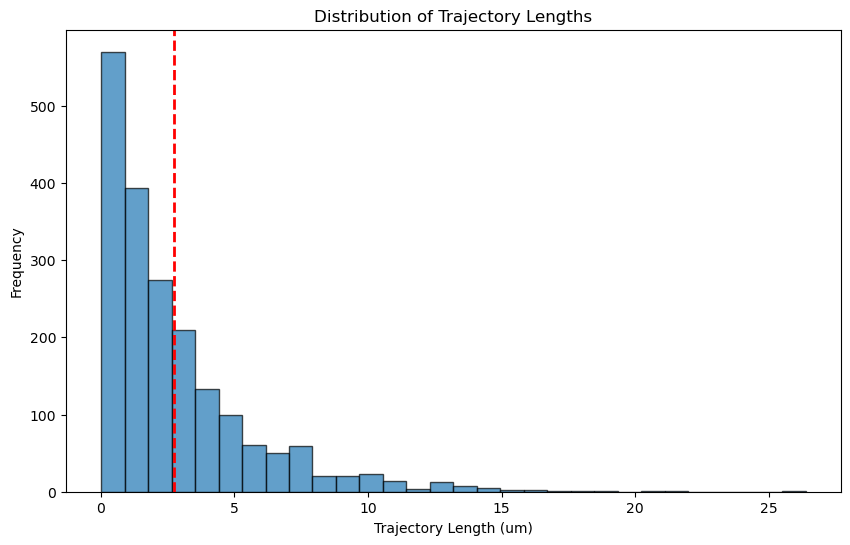

In [13]:
pb.plot_traj_end_to_end_lentgth(loaded_params)